<a href="https://colab.research.google.com/github/avicennamumtaza/courses-computervision/blob/main/module6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

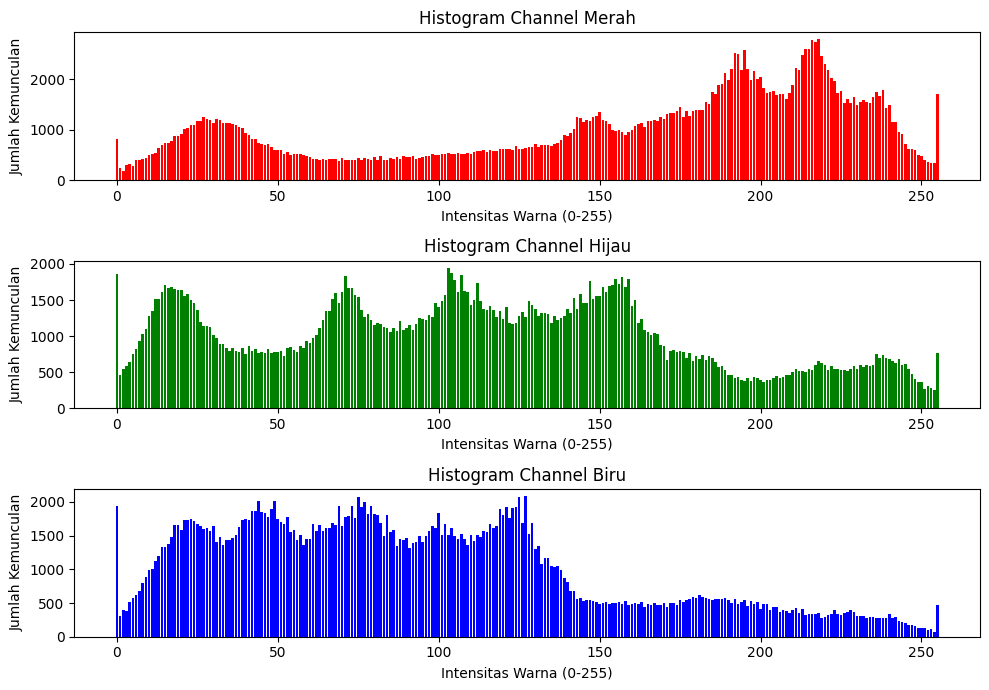

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Baca gambar (gunakan gambar lena.jpg yang Anda upload)
image_path = '/content/drive/MyDrive/PCVK/lena.jpg'
img = cv2.imread(image_path)

# Pastikan gambar berhasil dibaca
if img is None:
    print("Gagal membaca gambar.")
else:
    # Pisahkan channel warna (BGR di OpenCV)
    blue_channel = img[:, :, 0]
    green_channel = img[:, :, 1]
    red_channel = img[:, :, 2]

    # Inisialisasi histogram untuk setiap channel
    histogram_red = np.zeros(256)
    histogram_green = np.zeros(256)
    histogram_blue = np.zeros(256)

    # Hitung histogram untuk setiap channel warna
    height, width, _ = img.shape
    for i in range(height):
        for j in range(width):
            histogram_red[red_channel[i, j]] += 1
            histogram_green[green_channel[i, j]] += 1
            histogram_blue[blue_channel[i, j]] += 1

    # Visualisasikan histogram
    plt.figure(figsize=(10, 7))

    # Plot histogram untuk channel merah
    plt.subplot(3, 1, 1)
    plt.bar(range(256), histogram_red, color='red')
    plt.title('Histogram Channel Merah')
    plt.xlabel('Intensitas Warna (0-255)')
    plt.ylabel('Jumlah Kemunculan')

    # Plot histogram untuk channel hijau
    plt.subplot(3, 1, 2)
    plt.bar(range(256), histogram_green, color='green')
    plt.title('Histogram Channel Hijau')
    plt.xlabel('Intensitas Warna (0-255)')
    plt.ylabel('Jumlah Kemunculan')

    # Plot histogram untuk channel biru
    plt.subplot(3, 1, 3)
    plt.bar(range(256), histogram_blue, color='blue')
    plt.title('Histogram Channel Biru')
    plt.xlabel('Intensitas Warna (0-255)')
    plt.ylabel('Jumlah Kemunculan')

    # Tampilkan plot
    plt.tight_layout()
    plt.show()

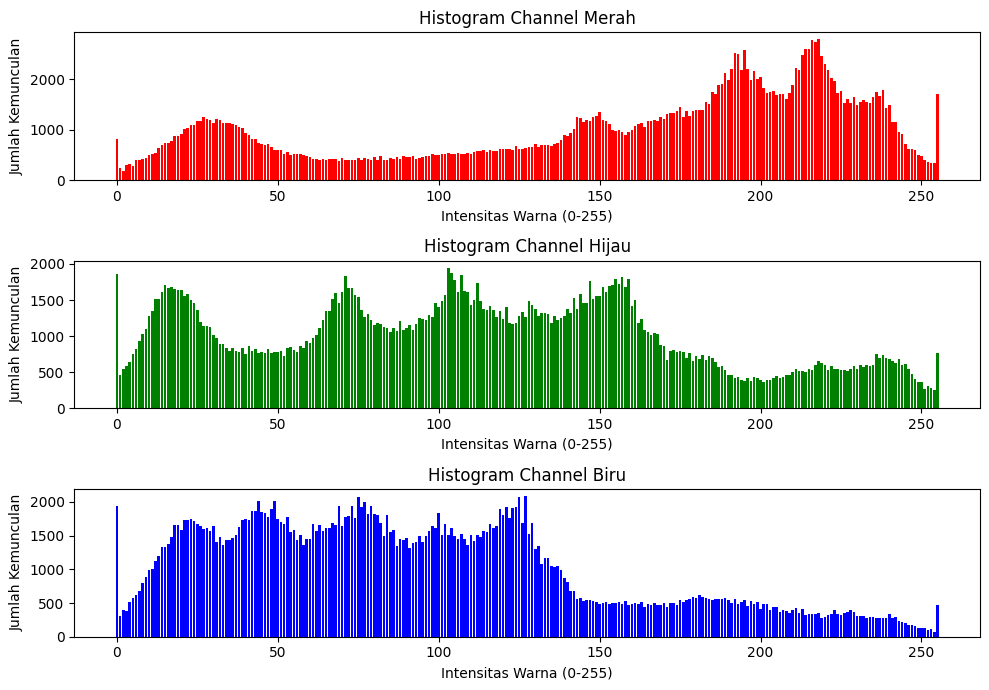

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Baca gambar (gunakan gambar lena.jpg yang Anda upload)
image_path = '/content/drive/MyDrive/PCVK/lena.jpg'
img = cv2.imread(image_path)

# Pastikan gambar berhasil dibaca
if img is None:
    print("Gagal membaca gambar.")
else:
    # Pisahkan channel warna (BGR di OpenCV)
    blue_channel = img[:, :, 0]
    green_channel = img[:, :, 1]
    red_channel = img[:, :, 2]

    # Gunakan np.histogram untuk menghitung histogram setiap channel
    histogram_red, _ = np.histogram(red_channel, bins=256, range=(0, 256))
    histogram_green, _ = np.histogram(green_channel, bins=256, range=(0, 256))
    histogram_blue, _ = np.histogram(blue_channel, bins=256, range=(0, 256))

    # Visualisasikan histogram
    plt.figure(figsize=(10, 7))

    # Plot histogram untuk channel merah
    plt.subplot(3, 1, 1)
    plt.bar(range(256), histogram_red, color='red')
    plt.title('Histogram Channel Merah')
    plt.xlabel('Intensitas Warna (0-255)')
    plt.ylabel('Jumlah Kemunculan')

    # Plot histogram untuk channel hijau
    plt.subplot(3, 1, 2)
    plt.bar(range(256), histogram_green, color='green')
    plt.title('Histogram Channel Hijau')
    plt.xlabel('Intensitas Warna (0-255)')
    plt.ylabel('Jumlah Kemunculan')

    # Plot histogram untuk channel biru
    plt.subplot(3, 1, 3)
    plt.bar(range(256), histogram_blue, color='blue')
    plt.title('Histogram Channel Biru')
    plt.xlabel('Intensitas Warna (0-255)')
    plt.ylabel('Jumlah Kemunculan')

    # Tampilkan plot
    plt.tight_layout()
    plt.show()

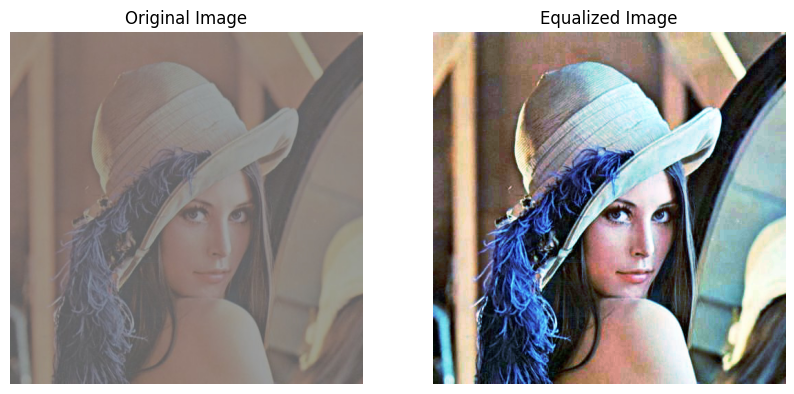

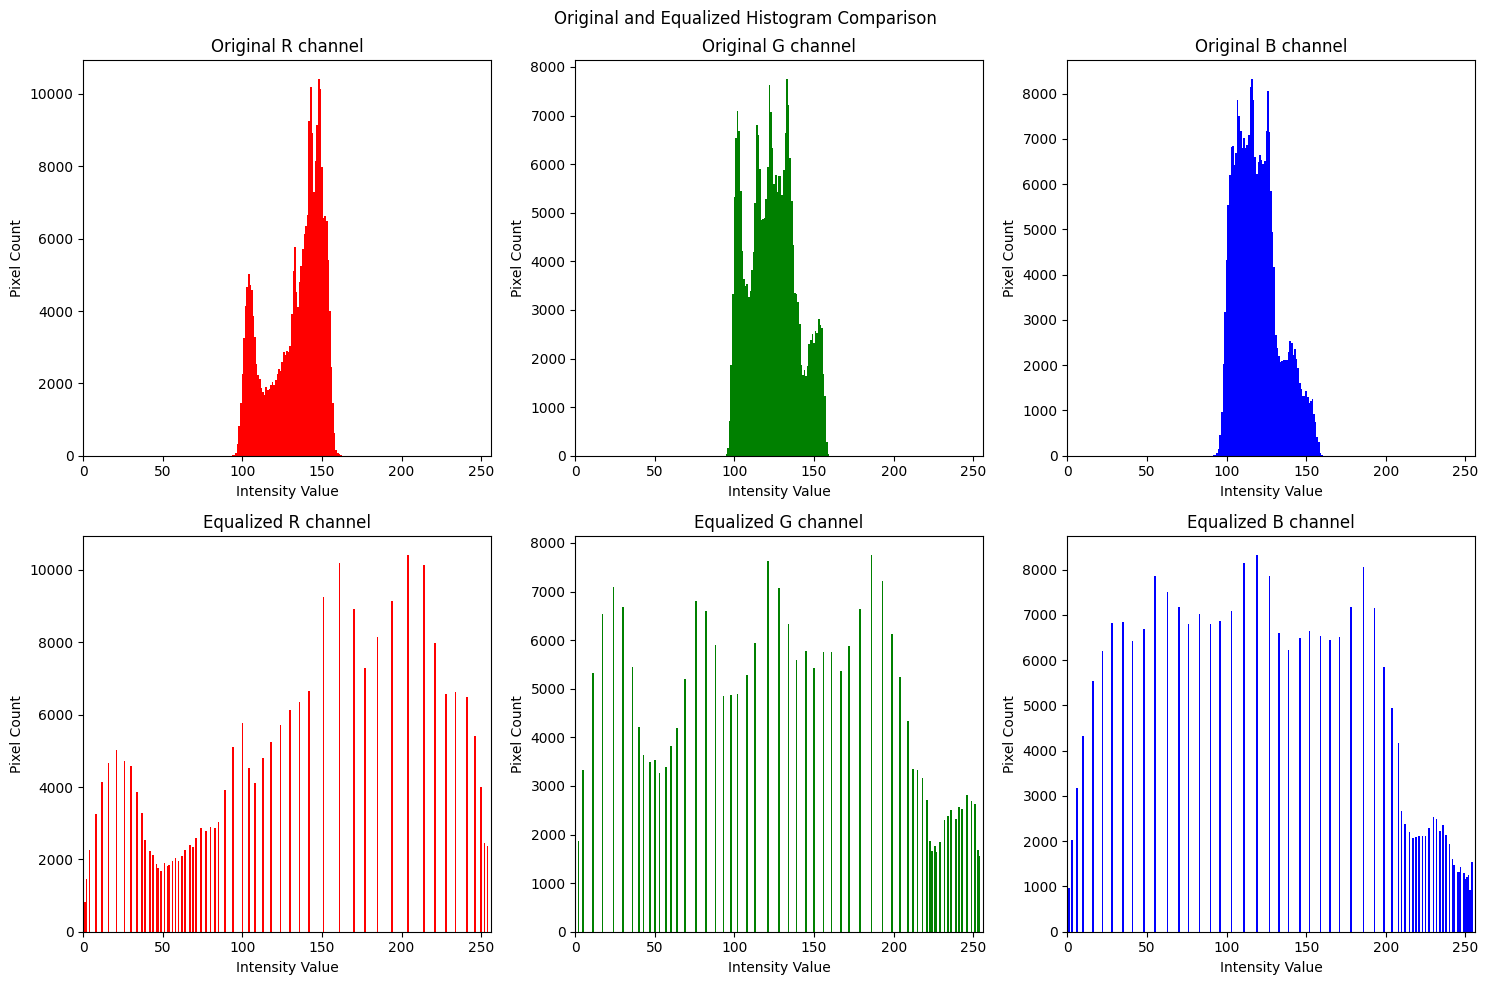

In [5]:
image = cv.imread('/content/drive/MyDrive/PCVK/lena_lc.jpg')
image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# Split the RGB channels
r, g, b = cv.split(image_rgb)

def manual_hist_equalization(channel):
    # Step 1: Calculate histogram
    hist, bins = np.histogram(channel.flatten(), bins=256, range=[0, 256])

    # Step 2: Calculate cumulative distribution function (CDF)
    cdf = hist.cumsum()

    # Step 3: Normalize the CDF to range [0, 255] (ignoring zeros in the CDF)
    cdf_m = np.ma.masked_equal(cdf, 0)  # Masking zeros to avoid division errors
    cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())  # Normalizing
    cdf_final = np.ma.filled(cdf_m, 0).astype('uint8')  # Fill masked places with 0

    # Step 4: Use the normalized CDF to map the original channel values
    channel_eq = cdf_final[channel]

    return channel_eq

# Apply manual histogram equalization to each channel
r_eq = manual_hist_equalization(r)
g_eq = manual_hist_equalization(g)
b_eq = manual_hist_equalization(b)

# Merge equalized channels back into an image
image_eq = cv.merge((r_eq, g_eq, b_eq))

# Function to plot histograms
def plot_histograms(image_ori, image_eq, title):
    plt.figure(figsize=(15, 10))
    channel_ids = [0, 1, 2]  # R, G, B
    colors = ['r', 'g', 'b']
    for i, color in zip(channel_ids, colors):
        # Original image channel data
        channel_data_ori = image_ori[:, :, i].ravel()
        histogram_ori, bins_ori = np.histogram(channel_data_ori, bins=256, range=(0, 256))

        # Equalized image channel data
        channel_data_eq = image_eq[:, :, i].ravel()
        histogram_eq, bins_eq = np.histogram(channel_data_eq, bins=256, range=(0, 256))

        # Plot histogram for original image
        plt.subplot(2, 3, i + 1)
        plt.bar(bins_ori[:-1], histogram_ori, color=color, width=1.0)
        plt.xlim([0, 256])
        plt.title(f'Original {color.upper()} channel')
        plt.xlabel('Intensity Value')
        plt.ylabel('Pixel Count')

        # Plot histogram for equalized image
        plt.subplot(2, 3, i + 4)
        plt.bar(bins_eq[:-1], histogram_eq, color=color, width=1.0)
        plt.xlim([0, 256])
        plt.title(f'Equalized {color.upper()} channel')
        plt.xlabel('Intensity Value')
        plt.ylabel('Pixel Count')

    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

# Show original and equalized images side by side
plt.figure(figsize=(10, 5))

# Display original RGB image
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

# Display equalized RGB image
plt.subplot(1, 2, 2)
plt.imshow(image_eq)
plt.title('Equalized Image')
plt.axis('off')

plt.show()

# Plot histograms for original and equalized images
plot_histograms(image_rgb, image_eq, 'Original and Equalized Histogram Comparison')

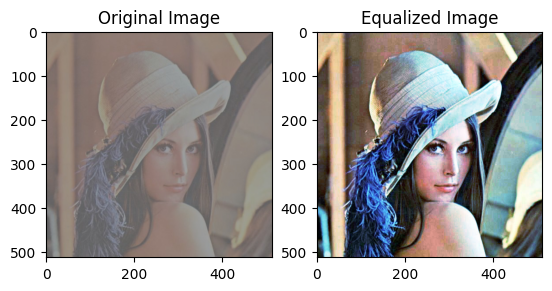

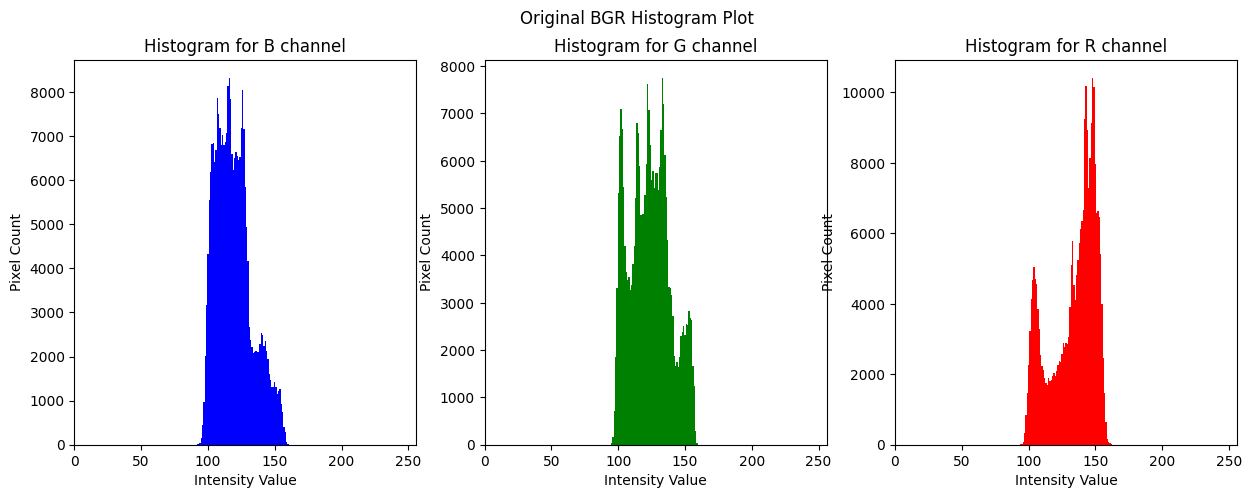

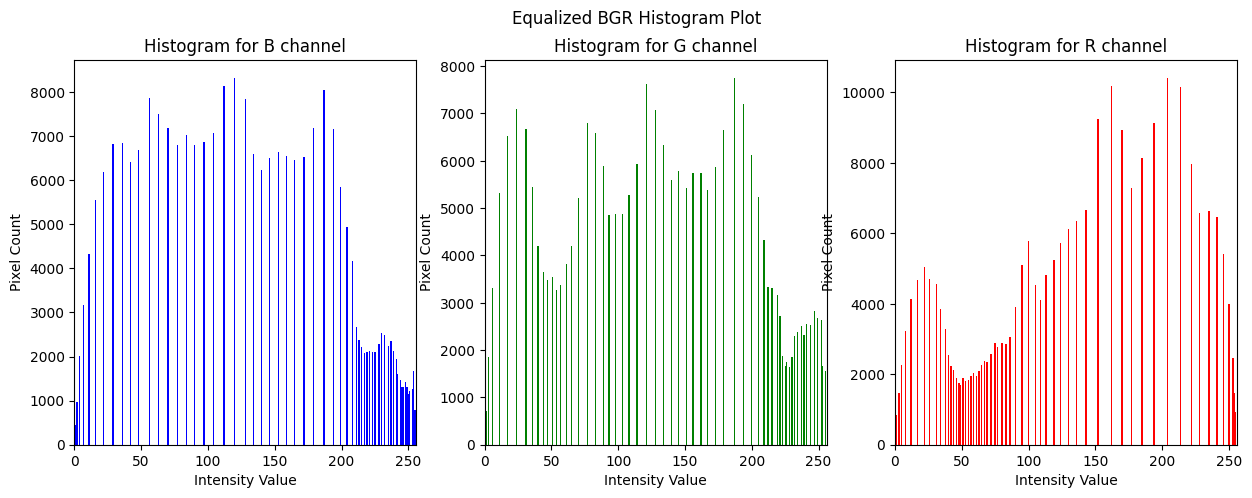

<Figure size 1000x500 with 0 Axes>

In [6]:
# Load the image
image = cv.imread('/content/drive/MyDrive/PCVK/lena_lc.jpg')

# Split the BGR channels
b, g, r = cv.split(image)

# Apply histogram equalization to each channel
b_eq = cv.equalizeHist(b)
g_eq = cv.equalizeHist(g)
r_eq = cv.equalizeHist(r)

# Merge equalized channels back into an image
image_eq = cv.merge((b_eq, g_eq, r_eq))

# Inisialisasi channel (BGR OpenCV default)
channel_ids = [0, 1, 2]  # B, G, R
colors = ['b', 'g', 'r']

# Function to plot histograms
def plot_histograms(image, title, position):
    plt.figure(figsize=(15, 5))
    for i, color in zip(channel_ids, colors):
        channel_data = image[:, :, i].ravel()
        histogram, bins = np.histogram(channel_data, bins=256, range=(0, 256))
        plt.subplot(1, 3, i+1)
        plt.bar(bins[:-1], histogram, color=color, width=1.0)
        plt.xlim([0, 256])
        plt.title(f'Histogram for {color.upper()} channel')
        plt.xlabel('Intensity Value')
        plt.ylabel('Pixel Count')
    plt.suptitle(title)
    plt.show()


plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))  # Convert BGR to RGB for correct display in Matplotlib
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(image_eq, cv.COLOR_BGR2RGB))  # Convert BGR to RGB for correct display in Matplotlib
plt.title('Equalized Image')
# Plot original image and its histogram
plot_histograms(image, 'Original BGR Histogram Plot', 1)

# Plot equalized image and its histogram
plot_histograms(image_eq, 'Equalized BGR Histogram Plot', 2)

# Show original and equalized images side by side
plt.figure(figsize=(10, 5))

plt.show()

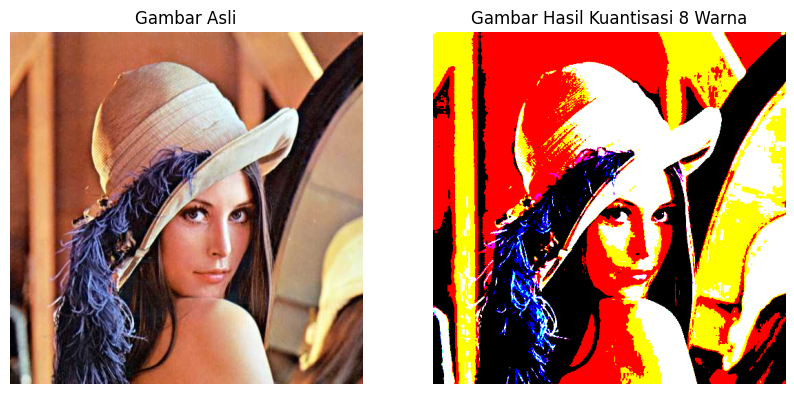

In [7]:
# Membaca gambar
image = cv.imread('/content/drive/MyDrive/PCVK/lena.jpg')

# Definisikan 8 warna dasar dalam RGB
colors = {
    'black': (0, 0, 0),
    'white': (255, 255, 255),
    'red': (255, 0, 0),
    'green': (0, 255, 0),
    'blue': (0, 0, 255),
    'yellow': (255, 255, 0),
    'cyan': (0, 255, 255),
    'magenta': (255, 0, 255)
}

# Fungsi untuk menghitung jarak antara dua warna
def color_distance(c1, c2):
    return np.sqrt(np.sum((np.array(c1) - np.array(c2)) ** 2))

# Fungsi untuk memetakan piksel ke warna terdekat
def quantize_color(pixel):
    distances = {color: color_distance(pixel, colors[color]) for color in colors}
    return colors[min(distances, key=distances.get)]

# Menerapkan kuantisasi warna untuk setiap piksel
quantized_image = np.zeros_like(image)

for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        quantized_image[i, j] = quantize_color(image[i, j])

# Konversi dari BGR ke RGB untuk ditampilkan menggunakan matplotlib
image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)
quantized_image_rgb = cv.cvtColor(quantized_image, cv.COLOR_BGR2RGB)

# Menampilkan gambar asli dan hasil kuantisasi
plt.figure(figsize=(10, 5))

# Gambar asli
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Gambar Asli')
plt.axis('off')

# Gambar hasil kuantisasi
plt.subplot(1, 2, 2)
plt.imshow(quantized_image_rgb)
plt.title('Gambar Hasil Kuantisasi 8 Warna')
plt.axis('off')

plt.show()

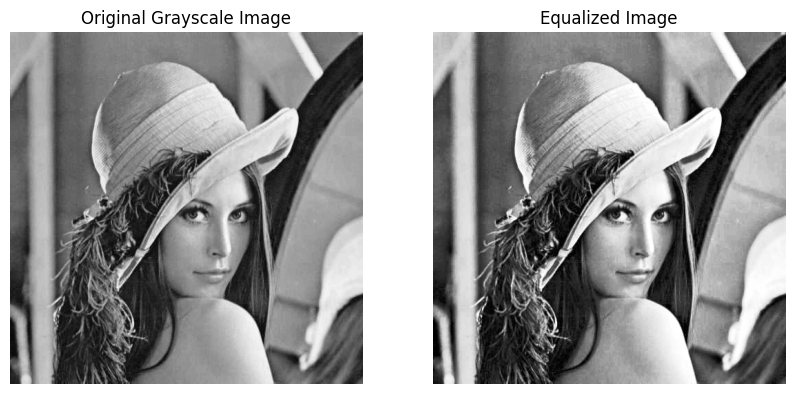

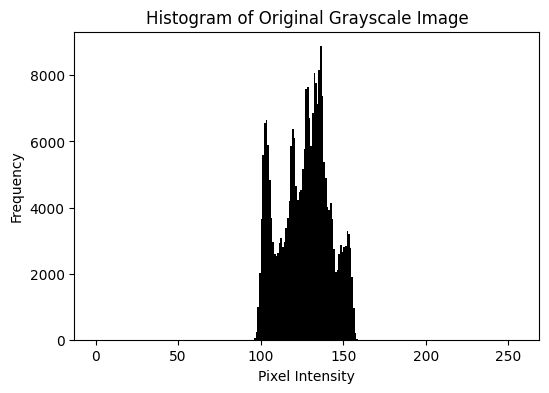

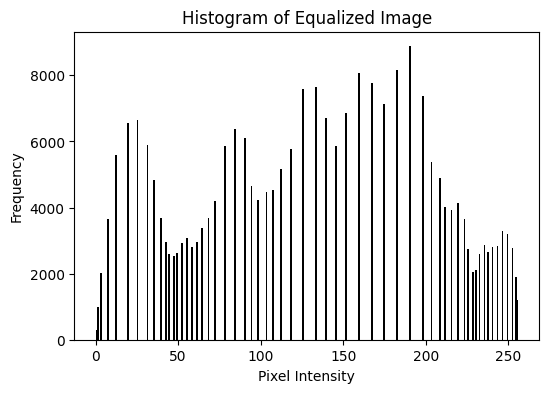

In [8]:
# Load the image
image = cv.imread('/content/drive/MyDrive/PCVK/lena_lc.jpg')


# Convert the image to grayscale
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

# Apply histogram equalization
equalized_image = cv.equalizeHist(gray_image)

# Function to plot histogram
def plot_histogram(image, title):
    plt.figure(figsize=(6, 4))
    plt.hist(image.ravel(), bins=256, range=(0, 256), color='black')
    plt.title(title)
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.show()

# Menampilkan gambar asli dan hasil histogram equalization
plt.figure(figsize=(10, 5))

# Gambar asli (grayscale)
plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

# Gambar setelah histogram equalization
plt.subplot(1, 2, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')

plt.show()

# Plot histogram untuk gambar asli
plot_histogram(gray_image, 'Histogram of Original Grayscale Image')

# Plot histogram untuk gambar hasil equalization
plot_histogram(equalized_image, 'Histogram of Equalized Image')

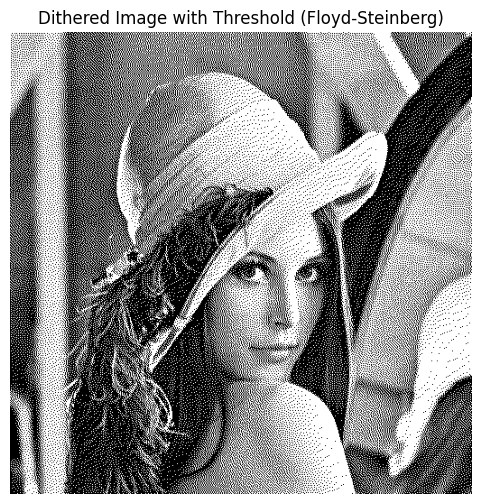

In [21]:
# Function to apply threshold to a pixel (binarization)
def apply_threshold(value):
    return 255 if value > 128 else 0

# Floyd-Steinberg Dithering Algorithm Implementation
def floyd_steinberg_dithering(image):
    # Make a copy of the grayscale image to apply dithering
    dithered_image = image.copy().astype(float)  # Use float for precise error calculation

    # Get image dimensions
    height, width = dithered_image.shape

    for y in range(height):
        for x in range(width):
            # Get the old pixel value
            old_pixel = dithered_image[y, x]

            # Apply thresholding (binarization)
            new_pixel = apply_threshold(old_pixel)
            dithered_image[y, x] = new_pixel

            # Calculate the quantization error
            error = old_pixel - new_pixel

            # Spread the error to neighboring pixels using Floyd-Steinberg coefficients
            if x + 1 < width:
                dithered_image[y, x + 1] += error * 7 / 16
            if x - 1 >= 0 and y + 1 < height:
                dithered_image[y + 1, x - 1] += error * 3 / 16
            if y + 1 < height:
                dithered_image[y + 1, x] += error * 5 / 16
            if x + 1 < width and y + 1 < height:
                dithered_image[y + 1, x + 1] += error * 1 / 16

    # Clip values to stay within valid pixel range
    dithered_image = np.clip(dithered_image, 0, 255)
    return dithered_image.astype(np.uint8)

# Apply Floyd-Steinberg dithering to the equalized grayscale image
dithered_image = floyd_steinberg_dithering(equalized_image)

# Display the dithered image
plt.figure(figsize=(10, 6))
plt.imshow(dithered_image, cmap='gray')
plt.title('Dithered Image with Threshold (Floyd-Steinberg)')
plt.axis('off')
plt.show()